In [2]:
import numpy as np
import tensorflow as tf
import tensorboard_jupyter as tb
import matplotlib.pyplot as plt
from tensorflow.python.framework import ops

ops.reset_default_graph()
sess = tf.Session()

batch_size = 20

x_vals = np.random.normal(1, 0.1, 100)
y_vals = np.repeat(10., 100)

with tf.name_scope('x_data') as scope:
    x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
with tf.name_scope('y_target') as scope:
    y_target = tf.placeholder(shape=[None, 1], dtype = tf.float32)
with tf.name_scope('A') as scope:
    A = tf.Variable(tf.random_normal(shape=[1,1]))

# 行列の乗算はmultiplyではなくmatmul
with tf.name_scope('model') as scope:
    my_output = tf.matmul(x_data, A)

# L2損失
with tf.name_scope('loss') as scope:
    loss = tf.reduce_mean(tf.square(my_output - y_target))

# 変数初期化
init = tf.global_variables_initializer()
sess.run(init)

# 変数最適化方法
my_opt = tf.train.GradientDescentOptimizer(learning_rate=0.02)
# L2損失を最小化するようにする
train_step = my_opt.minimize(loss)    

# batch
loss_batch = []
for i in range(100):
    rand_index = np.random.choice(100, size=batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    if (i+1)%5 == 0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)))
        temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
        print('Loss = ' + str(temp_loss))
        loss_batch.append(temp_loss)

tf.summary.FileWriter('./log/', sess.graph)
tb.show_graph(tf.get_default_graph().as_graph_def())

Step #5 A = [[ 1.29083765]]
Loss = 75.4278
Step #10 A = [[ 2.92079568]]
Loss = 49.2325
Step #15 A = [[ 4.21981287]]
Loss = 32.0051
Step #20 A = [[ 5.27692461]]
Loss = 20.7793
Step #25 A = [[ 6.13545561]]
Loss = 15.5267
Step #30 A = [[ 6.82479858]]
Loss = 8.81392
Step #35 A = [[ 7.38188076]]
Loss = 6.29949
Step #40 A = [[ 7.84054852]]
Loss = 4.56403
Step #45 A = [[ 8.19752789]]
Loss = 3.3153
Step #50 A = [[ 8.4921608]]
Loss = 2.95669
Step #55 A = [[ 8.74702072]]
Loss = 1.5402
Step #60 A = [[ 8.95101452]]
Loss = 1.61171
Step #65 A = [[ 9.11078644]]
Loss = 1.45914
Step #70 A = [[ 9.26122665]]
Loss = 1.25151
Step #75 A = [[ 9.37817097]]
Loss = 0.700192
Step #80 A = [[ 9.45990849]]
Loss = 1.05962
Step #85 A = [[ 9.53127003]]
Loss = 0.630198
Step #90 A = [[ 9.62071133]]
Loss = 1.11771
Step #95 A = [[ 9.65822411]]
Loss = 1.00052
Step #100 A = [[ 9.69619465]]
Loss = 0.45866


In [11]:
ops.reset_default_graph()
sess = tf.Session()

x_vals = np.random.normal(1, 0.1, 100)
y_vals = np.repeat(10., 100)

with tf.name_scope('x_data') as scope:
    # バッチじゃないのでshapeが1
    x_data = tf.placeholder(shape=[1], dtype=tf.float32)
with tf.name_scope('y_target') as scope:
    # バッチじゃないのでshapeが1
    y_target = tf.placeholder(shape=[1], dtype = tf.float32)
with tf.name_scope('A') as scope:
    # バッチじゃないのでshapeが1
    A = tf.Variable(tf.random_normal(shape=[1]))

# 行列の乗算はmultiplyではなくmatmul
with tf.name_scope('model') as scope:
    my_output = tf.multiply(x_data, A)

# L2損失
with tf.name_scope('loss') as scope:
    loss = tf.reduce_mean(tf.square(my_output - y_target))

# 変数初期化
init = tf.global_variables_initializer()
sess.run(init)

# 変数最適化方法
my_opt = tf.train.GradientDescentOptimizer(learning_rate=0.02)
# L2損失を最小化するようにする
train_step = my_opt.minimize(loss)    

# batch
loss_stochastic = []
for i in range(100):
    rand_index = np.random.choice(100) # batch_sizeを指定しない
    rand_x = [x_vals[rand_index]]
    rand_y = [y_vals[rand_index]]
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    if (i+1)%5 == 0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)))
        temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
        print('Loss = ' + str(temp_loss))
        loss_stochastic.append(temp_loss)

tf.summary.FileWriter('./log/', sess.graph)
tb.show_graph(tf.get_default_graph().as_graph_def())

Step #5 A = [ 2.30664325]
Loss = 64.0579
Step #10 A = [ 3.7295239]
Loss = 42.1599
Step #15 A = [ 4.86925888]
Loss = 33.4742
Step #20 A = [ 5.79545927]
Loss = 13.4455
Step #25 A = [ 6.58088446]
Loss = 16.1435
Step #30 A = [ 7.19020271]
Loss = 3.23541
Step #35 A = [ 7.7039423]
Loss = 8.56887
Step #40 A = [ 8.1881609]
Loss = 5.52907
Step #45 A = [ 8.55594921]
Loss = 2.41965
Step #50 A = [ 8.80843067]
Loss = 0.015243
Step #55 A = [ 9.01418781]
Loss = 2.18354
Step #60 A = [ 9.24213409]
Loss = 1.75747
Step #65 A = [ 9.43572426]
Loss = 0.919183
Step #70 A = [ 9.37527657]
Loss = 0.00533373
Step #75 A = [ 9.47947311]
Loss = 0.208429
Step #80 A = [ 9.61249924]
Loss = 0.23817
Step #85 A = [ 9.65195847]
Loss = 0.0157428
Step #90 A = [ 9.71233082]
Loss = 0.225598
Step #95 A = [ 9.7670393]
Loss = 0.423233
Step #100 A = [ 9.70681]
Loss = 0.407058


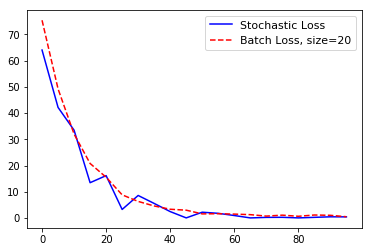

In [12]:
plt.plot(range(0, 100, 5), loss_stochastic, 'b-', label='Stochastic Loss')
plt.plot(range(0, 100, 5), loss_batch, 'r--', label='Batch Loss, size=20')
plt.legend(loc='upper right', prop={'size': 11})
plt.show()
# Batchの方がなめらかに下がっていく